In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [ ]:
demand_data=pd.read_csv('data\Demand_History.csv')
existing_ev=pd.read_csv('data\exisiting_EV_infrastructure_2018.csv')

In [ ]:
demand_data.head()

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,0.5,0.5,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572
1,1,1.5,0.5,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091
2,2,2.5,0.5,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254
3,3,3.5,0.5,0.420686,0.584055,0.906547,2.378577,3.888121,5.846089,9.083868,12.424885,15.012302
4,4,4.5,0.5,0.475621,0.647940,0.981544,2.665400,4.218711,6.776609,8.851107,11.731131,16.355563


In [ ]:
demand_data.describe()

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,4096.00000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,2047.50000,32.000000,32.000000,1.993306,4.017967,7.552549,19.323394,31.891712,42.249471,58.718724,75.805574,88.264071
std,1182.55768,18.475209,18.475209,1.849883,4.003144,7.658317,19.080365,31.270080,39.501338,56.133565,76.390728,79.513884
min,0.00000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1023.75000,16.250000,16.250000,0.474756,0.898346,1.613829,4.480010,6.958344,10.634926,15.245858,22.668290,25.275349
50%,2047.50000,32.000000,32.000000,1.163430,2.134510,3.854949,10.045907,17.872258,24.146146,31.755415,37.285351,54.567937
75%,3071.25000,47.750000,47.750000,3.665382,6.996849,13.579687,34.418367,56.016385,77.892036,108.528007,138.112588,158.637564
max,4095.00000,63.500000,63.500000,6.641083,14.961144,28.383260,70.789208,117.063595,148.491476,219.652855,302.729826,317.422418


In [ ]:
existing_ev.head()

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS
0,0,50.163110,19.412014,23,5,3
1,1,37.336451,58.119225,27,4,7
2,2,46.709232,57.525650,31,6,14
3,3,30.528626,55.379835,26,5,5
4,4,51.521781,35.116755,32,11,6


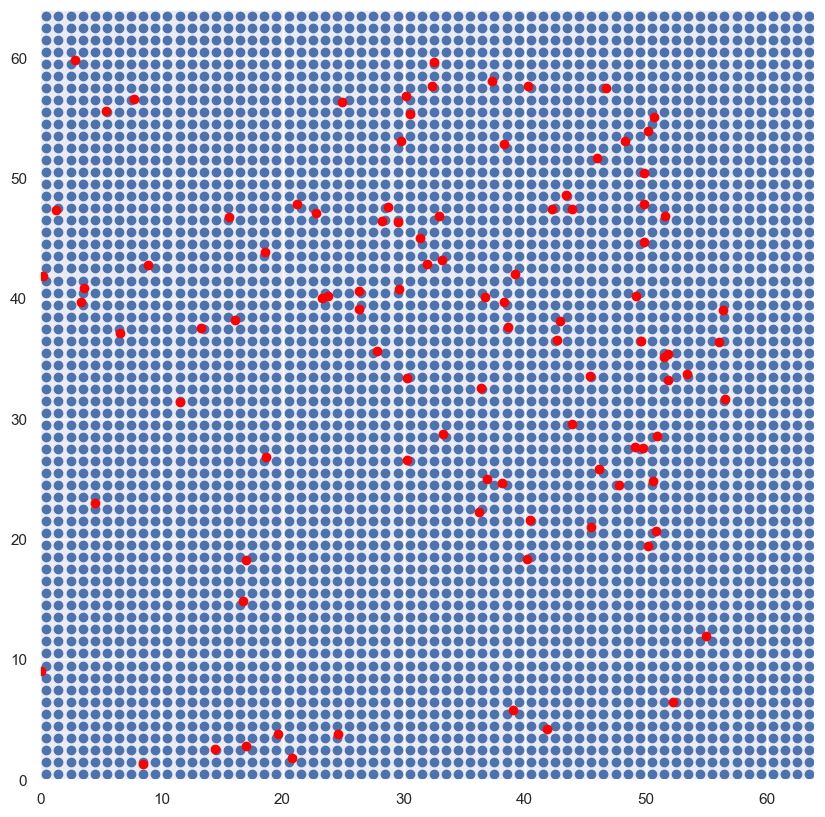

In [ ]:
# x=np.linspace(0,63.50,4096)
x=demand_data['x_coordinate']
y=demand_data['y_coordinate']
a=existing_ev['x_coordinate']
plt.figure(figsize=(10,10))
y=np.linspace(0,63.50,4096)
plt.scatter(demand_data['x_coordinate'],demand_data['y_coordinate'])
plt.scatter(existing_ev['x_coordinate'],existing_ev['y_coordinate'],c='red')
# plt.scatter()
# plt.axhline(y=.4, xmin=0, xmax=, linewidth=2, color = 'k')
plt.xlim((0,64))
plt.ylim((0,64))
plt.show()
# print(x)
# print(y)

In [ ]:
a=KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=5)

In [ ]:
x.shape

(4096,)

In [ ]:
# a.shape

In [ ]:
def dist(a1,a2):
      return (sum((a1-a2)**2))

In [ ]:
dist(np.array([1,2]),np.array([1,4]))

4

In [1]:
# lets calculate for one demand_point
demand_pt=demand_data.iloc[:,[0,1,2]]
demand_pt.head()
# now making a dictionary
demand_dict={}
# list that will store the class for every demand_point
lst=[]
for i in demand_pt['demand_point_index']:
    ma_dist=0

    for j in existing_ev['supply_point_index']:
        # calculation the squared difference for each point from each supply point
        distance=dist(demand_pt.iloc[i,[1,2]].values,existing_ev.iloc[j,[1,2]])
        if(j==0):
            min_distance=distance
            class_choosen=0
        if(min_distance>distance):
            min_distance=distance
            class_choosen=j
    lst.append(class_choosen)    
    # print(len(lst))
        

        




NameError: name 'demand_data' is not defined

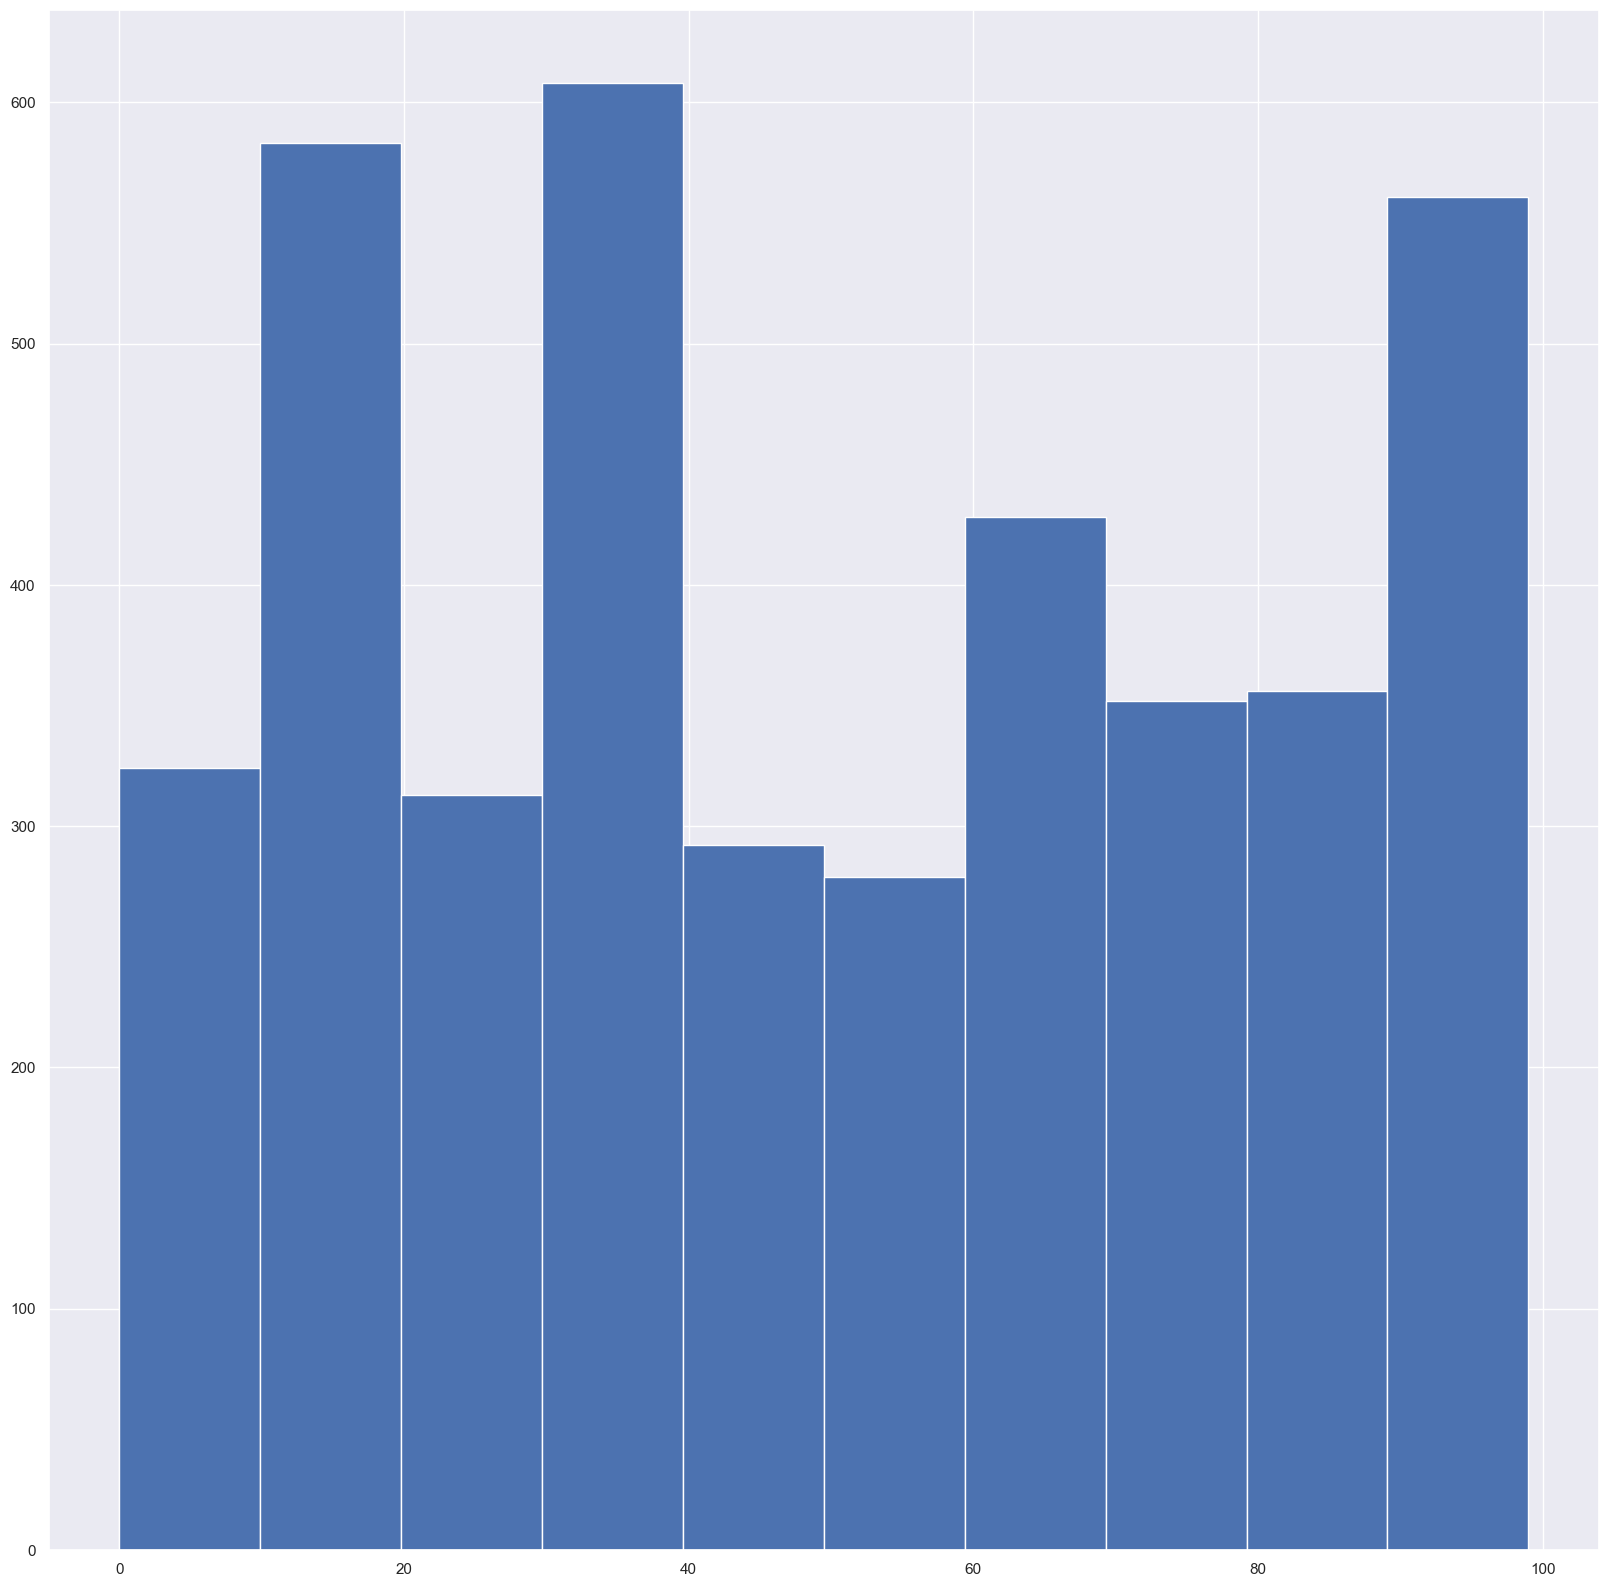

In [ ]:
lst=np.array(lst)
plt.figure(figsize=(20,20))
plt.hist(lst)
plt.show()

array([0. , 0.5])

array([124816.61419774, 148969.78355046])

In [ ]:
demand_supply=demand_pt.copy()


In [ ]:
demand_supply['supply_point_ka_index']=lst

In [ ]:
demand_supply.tail()

,demand_point_index,x_coordinate,y_coordinate,supply_point_ka_index
4091,4091,59.5,63.5,16
4092,4092,60.5,63.5,16
4093,4093,61.5,63.5,16
4094,4094,62.5,63.5,16
4095,4095,63.5,63.5,16


In [ ]:
demand_supply['supply_point_ka_index'].describe()

count    4096.000000
mean       49.816162
std        29.675414
min         0.000000
25%        24.000000
50%        47.000000
75%        76.000000
max        99.000000
Name: supply_point_ka_index, dtype: float64

In [ ]:
demand_supply.to_csv('isme_supply_ka_index hai.csv',index=False)


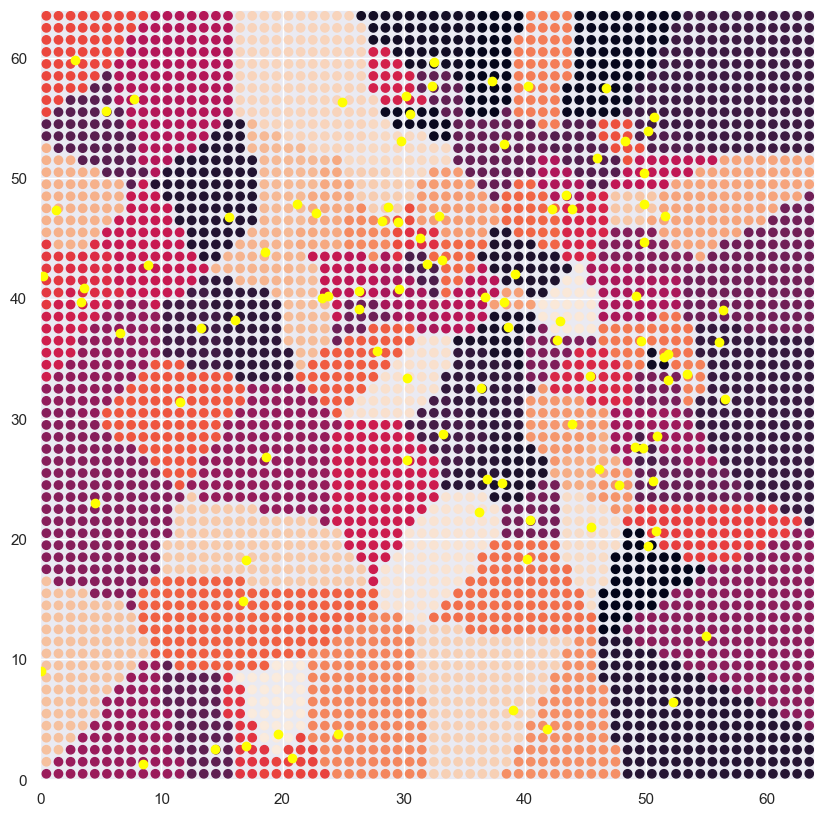

In [ ]:
# x=np.linspace(0,63.50,4096)
# x=demand_data['x_coordinate']
# y=demand_data['y_coordinate']
# a=existing_ev['x_coordinate']
plt.figure(figsize=(10,10))
# y=np.linspace(0,63.50,4096)
plt.scatter(demand_supply['x_coordinate'],demand_supply['y_coordinate'],c=demand_supply['supply_point_ka_index'])
plt.scatter(existing_ev['x_coordinate'],existing_ev['y_coordinate'],c='yellow')
# plt.scatter()
# plt.axhline(y=.4, xmin=0, xmax=, linewidth=2, color = 'k')
plt.xlim((0,64))
plt.ylim((0,64))
plt.show()
# print(x)
# print(y)